In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("C:\\Users\\LENOVO\\python datascience basics (hydrabad ds)\\ASSIGNMENT DATA SCIENCE\\SVM\\mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [2]:

X = df.iloc[:,1:-2]
X.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous


In [3]:
# DATA CLEANING
df.isnull().sum()

# Data transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
# Step 3: Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


In [5]:
# Step 4: Define features and target
Y = df["class"]   # Target
X = df.drop("class", axis=1)  # Features


In [6]:
import matplotlib.pyplot as plt


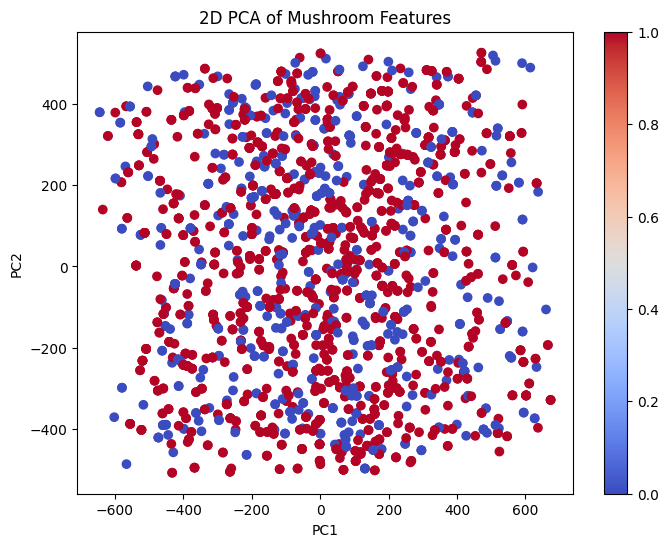

In [7]:
# Step 5: Visualize 2D scatter plot using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='coolwarm')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of Mushroom Features")
plt.colorbar()
plt.show()


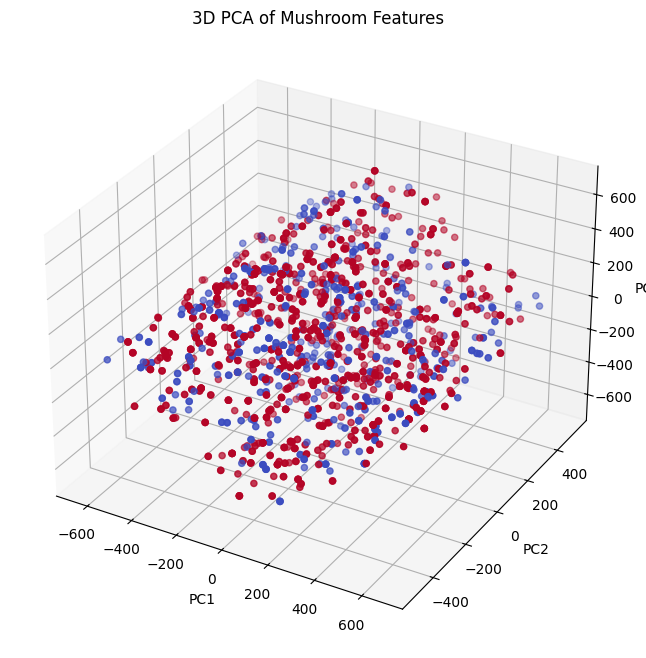

In [8]:
# Step 6: Visualize 3D scatter plot using PCA
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=Y, cmap='coolwarm')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA of Mushroom Features")
plt.show()


In [9]:
# Step 7: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [10]:
# Step 8: SVM Model Training
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)


In [14]:
# Step 9: Evaluate SVM Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    results[kernel] = accuracy

# Step 7: Print results
print("SVM Kernel Comparison (Accuracy Scores):")
for k, v in results.items():
    print(f"{k.upper()} Kernel: {v*100:.2f}%")


SVM Kernel Comparison (Accuracy Scores):
LINEAR Kernel: 69.17%
POLY Kernel: 69.17%
RBF Kernel: 69.17%


In [18]:


print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))


Confusion Matrix:
 [[  0 185]
 [  0 415]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600

Accuracy Score: 0.6916666666666667


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera